In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Display plots in the notebook
%matplotlib inline


In [7]:
df = pd.read_csv(r'C:\Users\ICA\Documents\IMDb Movies India.csv\IMDb Movies India.csv', encoding='latin1')

In [142]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0  109 min            Drama   
2                         #Homecoming  2021.0   90 min   Drama, Musical   
3                             #Yaaram  2019.0  110 min  Comedy, Romance   
4                   ...And Once Again  2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddha

In [146]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None


In [148]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Year       Rating
count  14981.000000  7919.000000
mean    1987.012215     5.841621
std       25.416689     1.381777
min     1913.000000     1.100000
25%     1968.000000     4.900000
50%     1991.000000     6.000000
75%     2009.000000     6.800000
max     2022.000000    10.000000


In [150]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

In [156]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [158]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


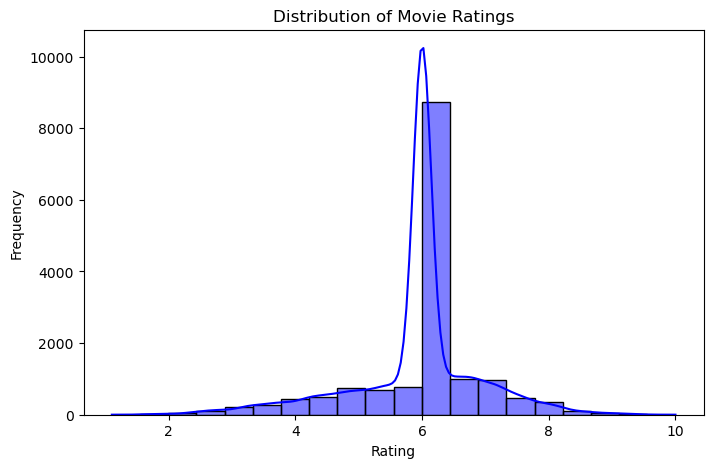

In [164]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

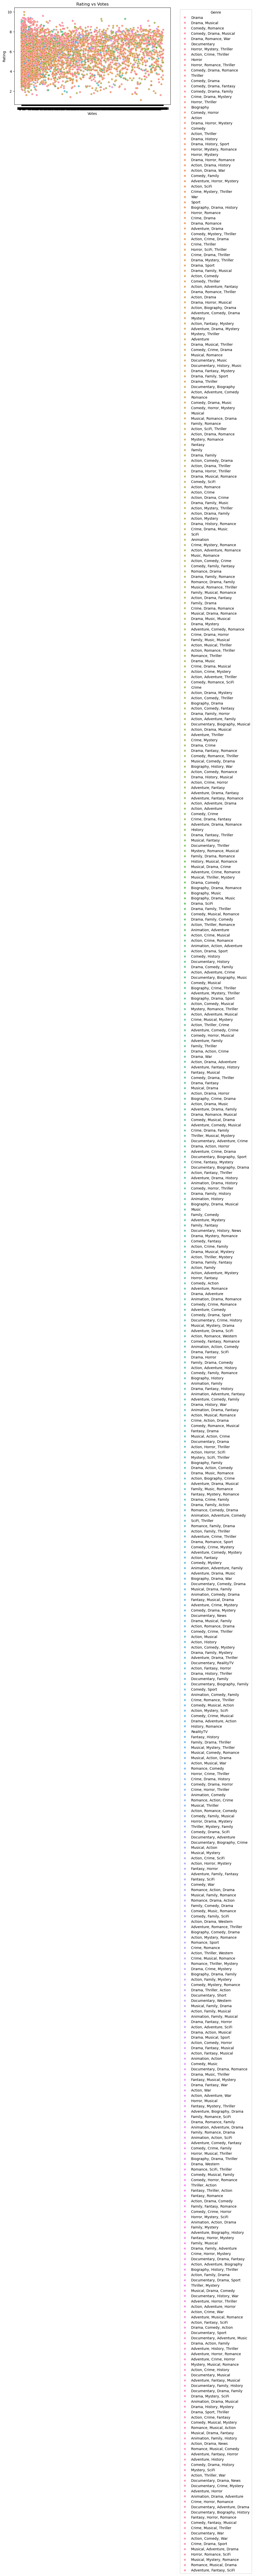

In [166]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Votes', y='Rating', hue='Genre', alpha=0.7)
plt.title('Rating vs Votes')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

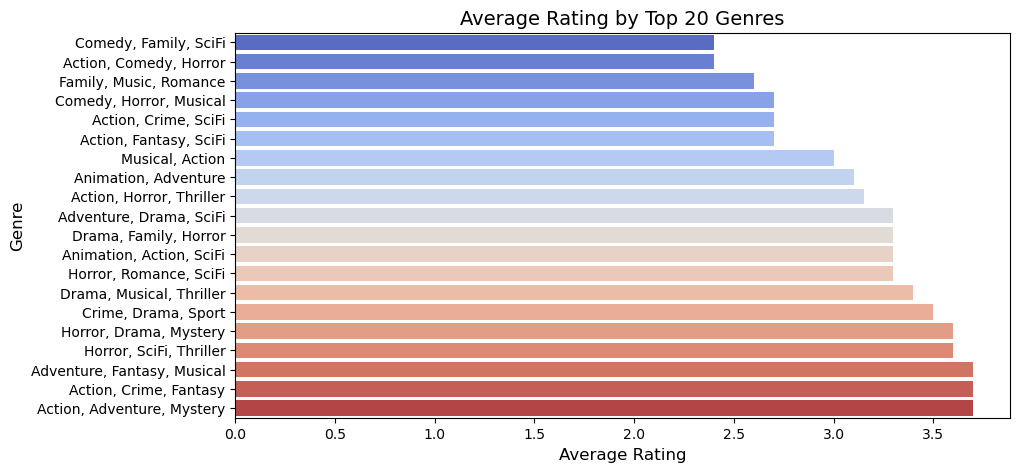

In [42]:
plt.figure(figsize=(10, 5))

# Group by 'Genre', calculate the mean of 'Rating', and sort by values
genre_rating = df.groupby('Genre')['Rating'].mean().sort_values()

# Select the top 20 genres
top_20_genres = genre_rating.head(20)

# Create the bar plot
sns.barplot(
    x=top_20_genres.values,
    y=top_20_genres.index,
    hue=top_20_genres.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)

# Set title and labels
plt.title('Average Rating by Top 20 Genres', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Display the plot
plt.show()


In [33]:
df_sample = df.sample(n=5000, random_state=42)

In [180]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Initialize the encoder with the correct parameter
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

# Fit and transform the categorical columns
categorical_encoded = encoder.fit_transform(df[categorical_features])

# Get the feature names (optional, for interpretation)
categorical_columns = encoder.get_feature_names_out(categorical_features)

print("Categorical encoding successful!")

Categorical encoding successful!


In [187]:
# Fill missing votes with zero
df['Votes'] = df['Votes'].fillna(0)

In [193]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [49]:
# Ensure the 'Duration' column is a string
df['Duration'] = df['Duration'].astype(str)

# Clean 'Duration' column - Extract numeric values only (e.g., remove 'min' and keep numbers)
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)  # Use raw string `r` for regex

# Verify all numeric features are valid
numeric_features = ['Year', 'Duration', 'Votes']
for col in numeric_features:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Non-numeric values detected in column: {col}")
        raise ValueError(f"Column {col} must contain only numeric values!")

# Scale numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(df[numeric_features])

print("Preprocessing complete!")


Preprocessing complete!


In [237]:
from scipy.sparse import hstack
X = hstack([numeric_scaled, categorical_encoded])

# Target variable
y = df['Rating']

In [255]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Check the column names
print(df.columns)

# Assuming 'Category' and 'Genre' are the correct column names
# If not, update the column names to match what is in your DataFrame
categorical_columns = ['Rating', 'Genre']  # Adjust this list based on actual column names

# Encode categorical columns
encoder = OneHotEncoder()  # No need to specify sparse=True
categorical_encoded = encoder.fit_transform(df[categorical_columns])

# Scale numeric data
numeric_features = ['Year', 'Duration', 'Votes']
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(df[numeric_features])

# Convert both to sparse matrices
numeric_scaled = csr_matrix(numeric_scaled)

# Combine numeric and categorical data
X = hstack([numeric_scaled, categorical_encoded])

# Check for missing values in the target variable
y = df['Rating']
if y.isnull().sum() > 0:
    print("Target variable has missing values. Handle them before fitting the model.")
    y = y.fillna(y.median())  # Or choose an imputation strategy

# Fit the model
model = LinearRegression()
model.fit(X, y)

print("Model training complete!")


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
Model training complete!


In [268]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (11309, 543)
Testing set size: (2828, 543)


In [270]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared Value: {r2:.2f}")


Mean Squared Error: 0.01
R-Squared Value: 0.99



Sample Predictions:
       Actual  Predicted
5246      6.0   6.000003
13278     6.0   6.000002
4486      6.2   6.200001
12042     7.5   7.499960
8665      6.0   6.000001


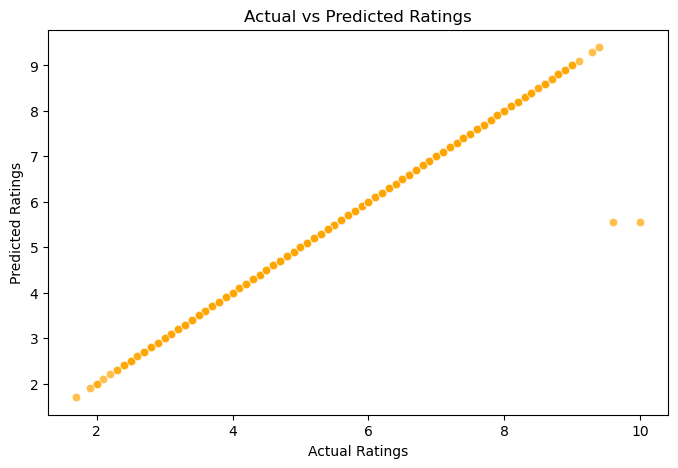

In [272]:
# Compare Actual vs Predicted Ratings
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(results.head())

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=results['Actual'], y=results['Predicted'], alpha=0.7, color='orange')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


In [274]:
df.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'
